In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Création du Dataset

In [13]:
points = np.random.random((200, 2))

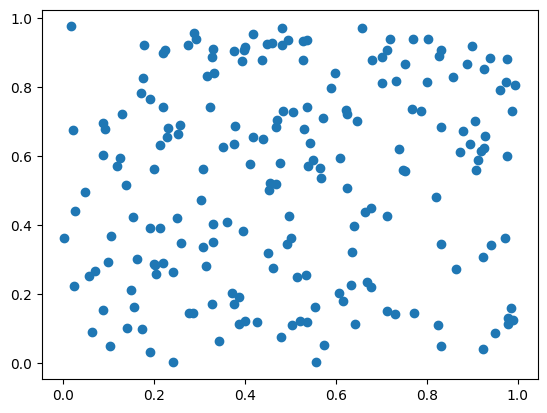

In [14]:
plt.scatter(points[:, 0], points[:, 1])
plt.show()

In [15]:
colors = []
Y = []
for p in points:
  if p[1] >= -p[0] + 0.7:
    colors.append('blue')
    Y.append(1.0)
  else:
    colors.append('red')
    Y.append(-1.0)


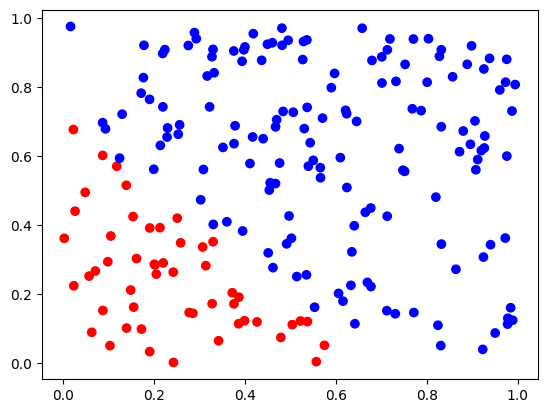

In [16]:
plt.scatter(points[:, 0], points[:, 1], c=colors)
plt.show()

# Création du modèle

In [17]:
W = np.random.random(3) * 2.0 - 1.0

In [18]:
def predict(W_model, X_to_predict):
  X_prime = np.hstack((np.ones((len(X_to_predict), 1)),X_to_predict))
  W_prime = np.expand_dims(W_model, 1)
  mat_product_result = np.matmul(X_prime, W_prime)
  mat_product_result[mat_product_result >= 0] = 1.0
  mat_product_result[mat_product_result < 0] = -1.0
  return mat_product_result

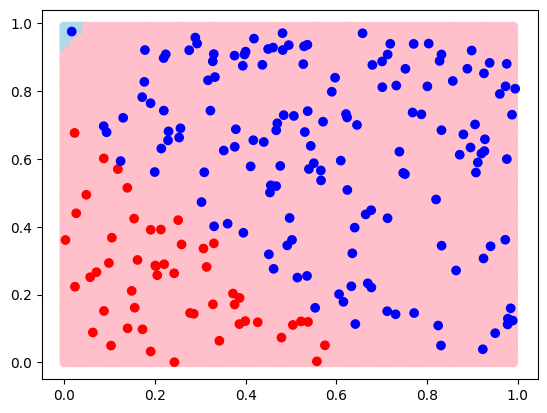

In [19]:
all_grid_points = []
all_grid_points_colors = []
for x1 in range(0, 100):
  for x2 in range(0, 100):
    x1_p = x1 / 100.0
    x2_p = x2 / 100.0
    predicted_value = predict(W, np.array([[x1_p, x2_p]]))[0][0]
    all_grid_points.append([x1_p, x2_p])
    all_grid_points_colors.append('lightblue' if predicted_value >= 0 else 'pink')
all_grid_points = np.array(all_grid_points)
plt.scatter(all_grid_points[:, 0], all_grid_points[:, 1], c = all_grid_points_colors)
plt.scatter(points[:, 0], points[:, 1], c=colors)
plt.show()

# Entrainement du modèle avec la règle de Rosenblatt

In [20]:
mean_squared_error = 0.0
error_points = []
for i in tqdm(range(100_000)):
  k = np.random.randint(0, len(points))
  X_k = points[k]
  Y_k = Y[k]
  g_X_k = predict(W, np.array([X_k]))[0][0]
  X_k_with_one = np.array([1.0, *X_k])
  W = W + 0.001 * (Y_k - g_X_k) * X_k_with_one
  mean_squared_error += (Y_k - g_X_k) ** 2
  if (i + 1) % 100 == 0:
    error_points.append([i, mean_squared_error / 100.0])
    mean_squared_error = 0.0
error_points = np.array(error_points)

100%|██████████| 100000/100000 [00:02<00:00, 35774.38it/s]


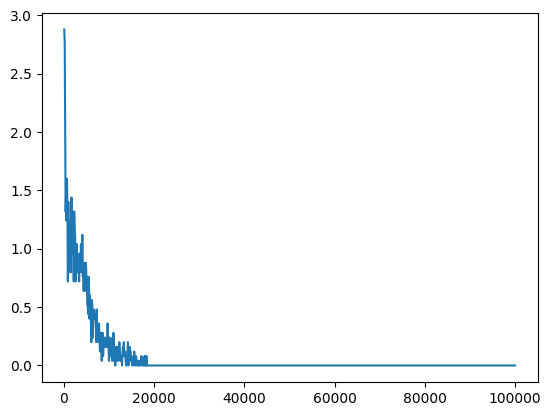

In [21]:
plt.plot(error_points[:, 0], error_points[:, 1])
plt.show()

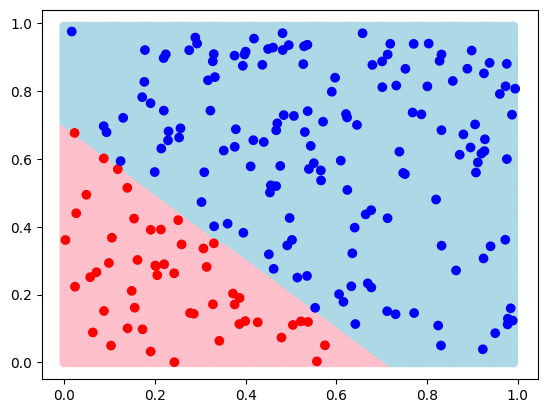

In [22]:
all_grid_points = []
all_grid_points_colors = []
for x1 in range(0, 100):
  for x2 in range(0, 100):
    x1_p = x1 / 100.0
    x2_p = x2 / 100.0
    predicted_value = predict(W, np.array([[x1_p, x2_p]]))[0][0]
    all_grid_points.append([x1_p, x2_p])
    all_grid_points_colors.append('lightblue' if predicted_value >= 0 else 'pink')
all_grid_points = np.array(all_grid_points)
plt.scatter(all_grid_points[:, 0], all_grid_points[:, 1], c = all_grid_points_colors)
plt.scatter(points[:, 0], points[:, 1], c=colors)
plt.show()